<a href="https://colab.research.google.com/github/FuRong1213-vibenshus/vibenshus/blob/master/DataScience/WorldCovidResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading the data##


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on world map


path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2020.csv'
df = pd.read_csv(path)
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3012 non-null   float64
 1   Admin2          3011 non-null   object 
 2   Province_State  3265 non-null   object 
 3   Country_Region  3450 non-null   object 
 4   Last_Update     3450 non-null   object 
 5   Lat             3378 non-null   float64
 6   Long_           3378 non-null   float64
 7   Confirmed       3450 non-null   int64  
 8   Deaths          3450 non-null   int64  
 9   Recovered       3450 non-null   int64  
 10  Active          3450 non-null   int64  
 11  Combined_Key    3450 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 323.6+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,39009.0,Athens,Ohio,US,2020-05-26 02:32:35,39.334256,-82.042786,14,2,0,12,"Athens, Ohio, US"
96,13003.0,Atkinson,Georgia,US,2020-05-26 02:32:35,31.296335,-82.875459,31,2,0,29,"Atkinson, Georgia, US"
97,34001.0,Atlantic,New Jersey,US,2020-05-26 02:32:35,39.475387,-74.658485,2036,144,0,1892,"Atlantic, New Jersey, US"
98,40005.0,Atoka,Oklahoma,US,2020-05-26 02:32:35,34.373666,-96.038025,1,0,0,1,"Atoka, Oklahoma, US"


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.6 MB/s 
     |████████████████████████████████| 956 kB 65.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


##Preprocessing the data##
Now since our data has loaded successfully, the next step is to preprocess the data before using it for plotting. It will include :

-Removing superfluous columns like ‘FIPS’, ‘Admin2', ‘Last_Update’ (since all the data is for single-day — 25th May).

-Removing columns ‘Province_State’ and ‘Combined_Key’ since statewide data is not available for all the countries.

-Grouping together data by ‘Country_Region’ and rename the column to ‘Country’

In [2]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,299,18,0,281
2,US,37.767072,-75.632346,731,11,0,720
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,8,0,0,8


In [3]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

<ipython-input-3-727609b8ab0a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()


,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11180,9860,1097,223
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4


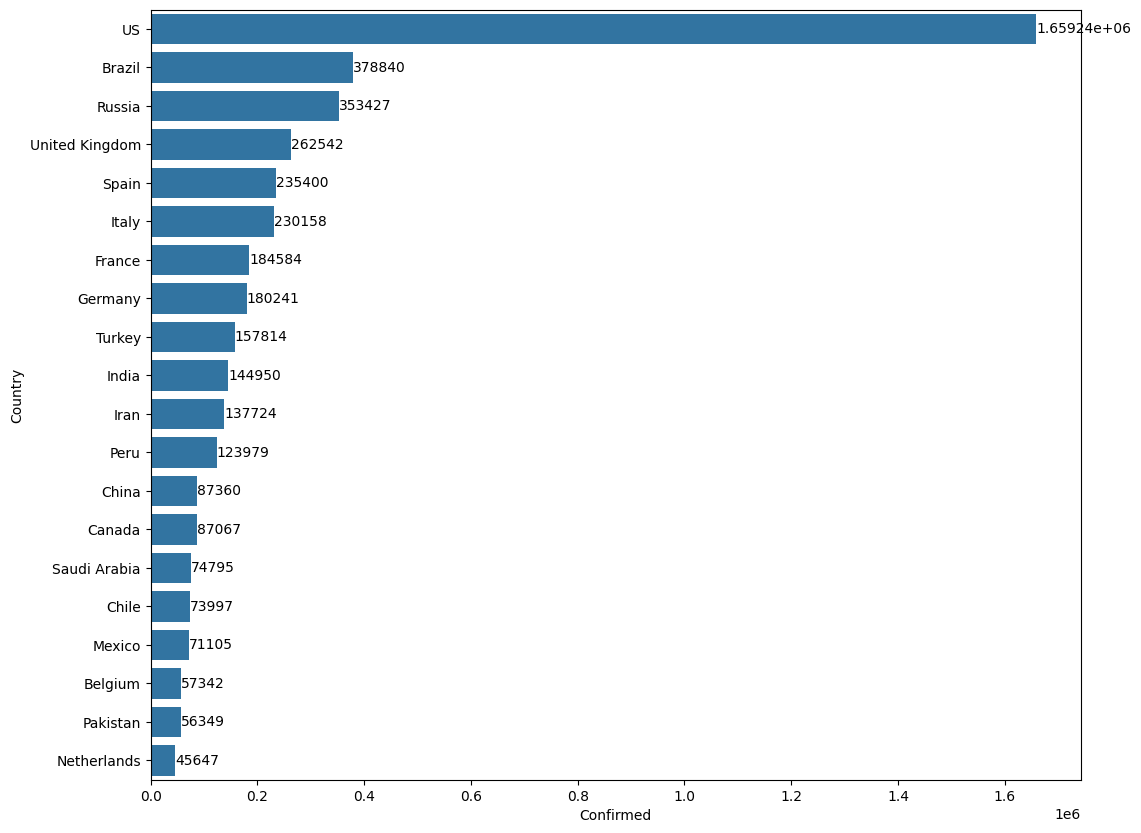

In [4]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(x=top_20['Confirmed'], y=top_20['Country'])
plot.bar_label(plot.containers[0])

plt.show()

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


##Plotting Confirmed and Active cases for the top 5 countries with the maximum number of confirmed cases##


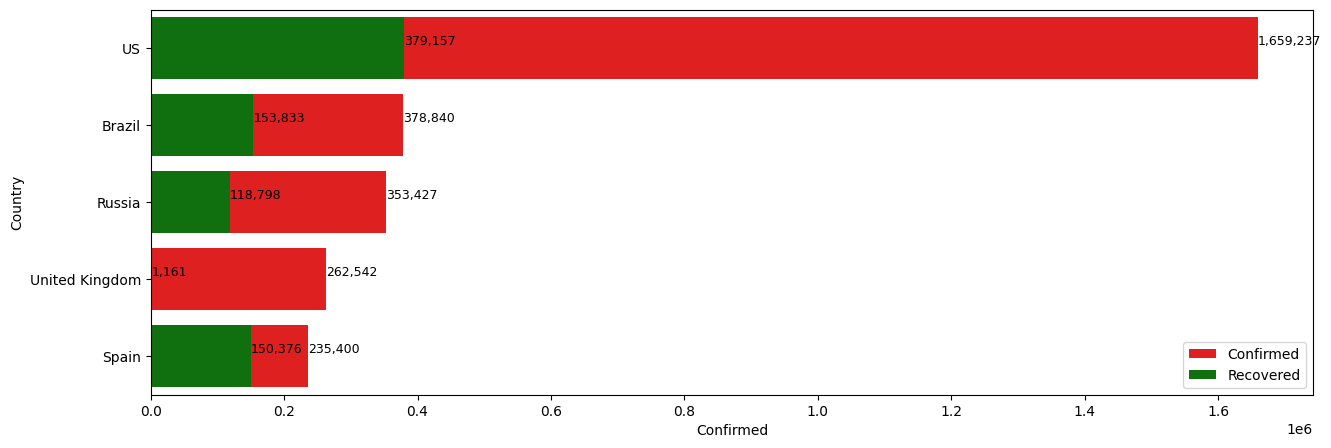

In [6]:
from matplotlib import container
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()
### Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(x=top_5['Confirmed'], y=top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(x=top_5['Recovered'], y=top_5['Country'], color = 'green', label='Recovered')
### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)

plt.legend(loc=4)
plt.show()

In [9]:
figure = px.choropleth(world,locations= 'Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='jet', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()